In [ ]:
!pip install sdv
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('processed_diabetic_data.csv')

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,0,0,75,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,0,0,10,75,1,1,7,3,...,0,1,0,0,0,0,0,1,1,1
2,64410,86047875,1,0,20,75,1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,0,1,30,75,1,1,7,2,...,0,1,0,0,0,0,0,1,1,0
4,16680,42519267,0,1,40,75,1,1,7,1,...,0,2,0,0,0,0,0,1,1,0


In [ ]:
#generating a test set by removing unnecessary features (encounter_id, patient_nbr) and selecting 1000 samples
data_test = data.iloc[:1000, 2:]
data_test.head()

In [ ]:
#apply sdv to the test set
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(data_test)

/usr/local/lib/python3.9/dist-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/usr/local/lib/python3.9/dist-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale
/usr/local/lib/python3.9/dist-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
/usr/local/lib/python3.9/dist-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: invalid value encountered in double_scalars
  b = (self.max - loc) / scale


In [ ]:
#sdv model generates a synthetic dataset (n = 1000)
sample = model.sample(1000)
sample.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,0,53,75,5,21,2,4,0,13,...,0,2,0,0,0,0,0,0,1,1
1,0,1,49,75,3,20,4,7,0,14,...,0,2,0,0,0,0,0,1,1,2
2,1,0,77,75,1,20,5,2,0,8,...,0,2,0,0,0,0,0,0,1,2
3,0,1,21,75,2,12,16,3,0,6,...,0,0,0,0,0,0,0,0,0,1
4,0,1,16,75,3,9,2,4,0,12,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
print(data_test.shape, sample.shape)

(1000, 48) (1000, 48)


In [ ]:
from table_evaluator import load_data, TableEvaluator

In [ ]:
table_evaluator = TableEvaluator(data_test, sample)

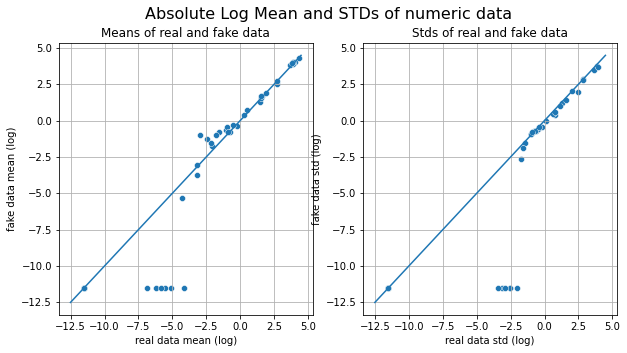

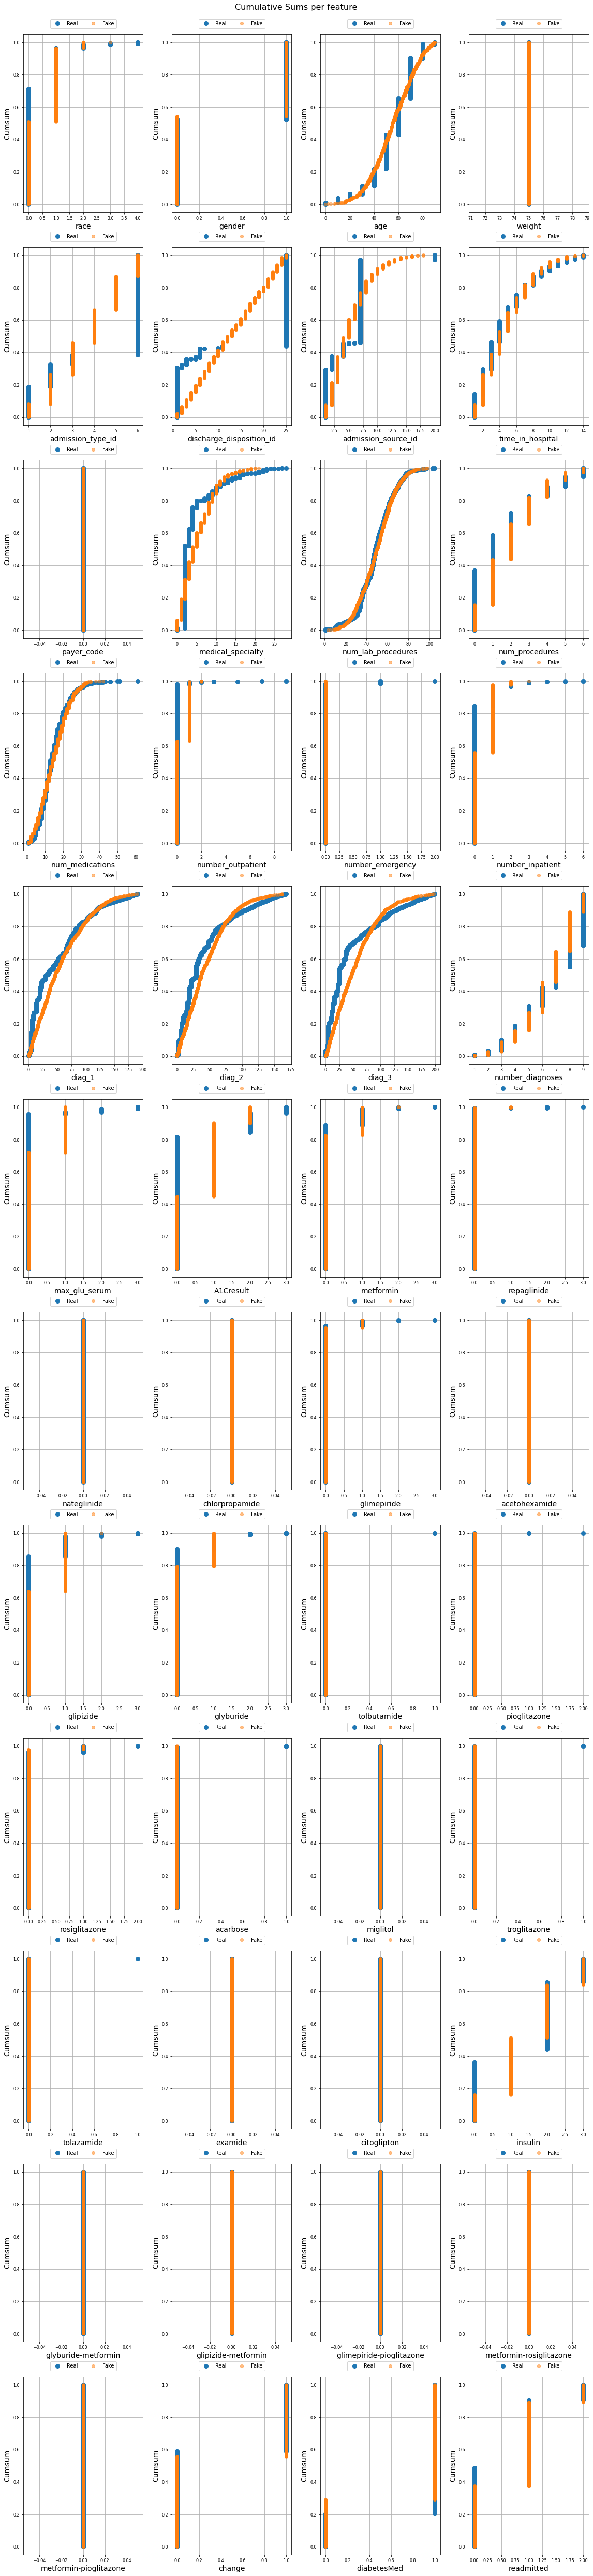

/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
/usr/local/lib/python3.9/dist-packages/table_evaluator/table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self

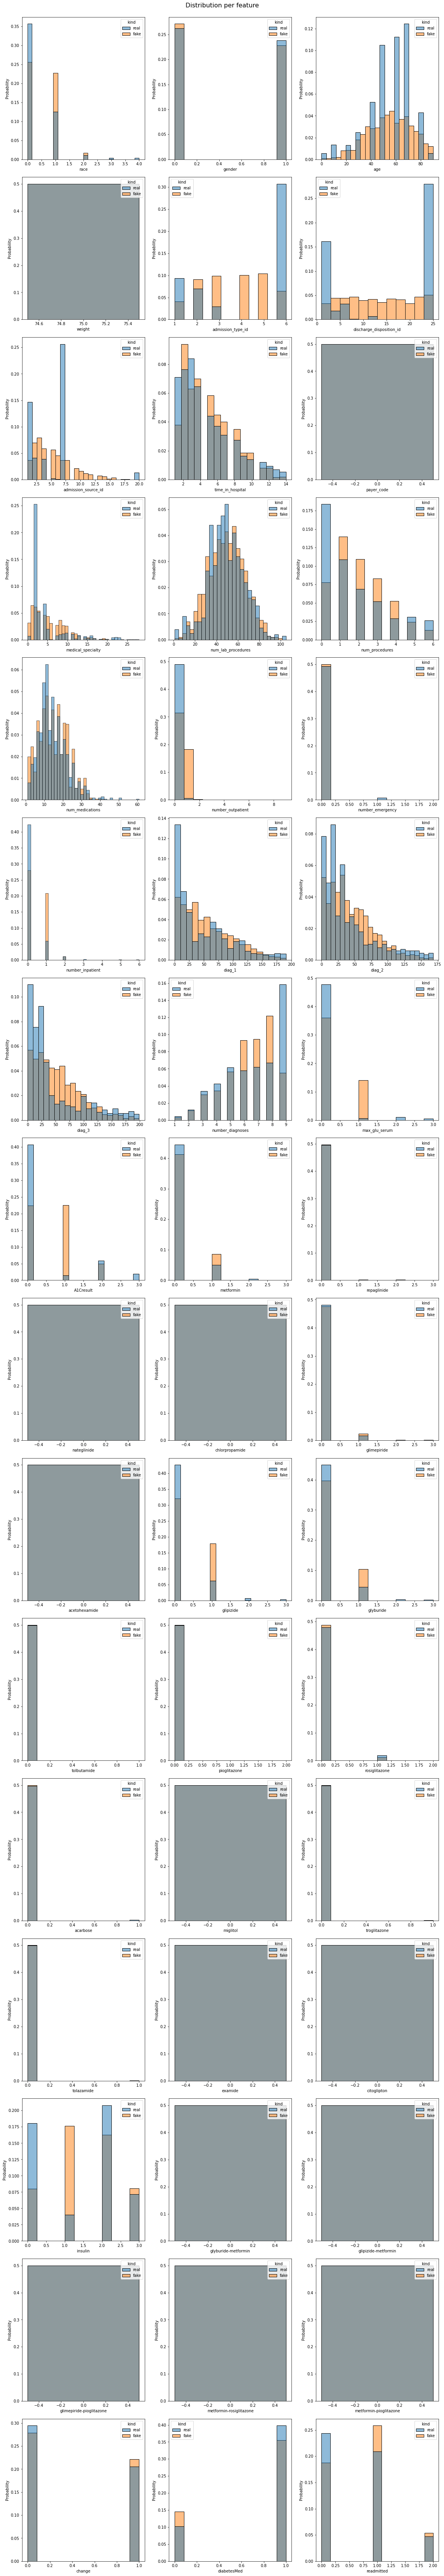

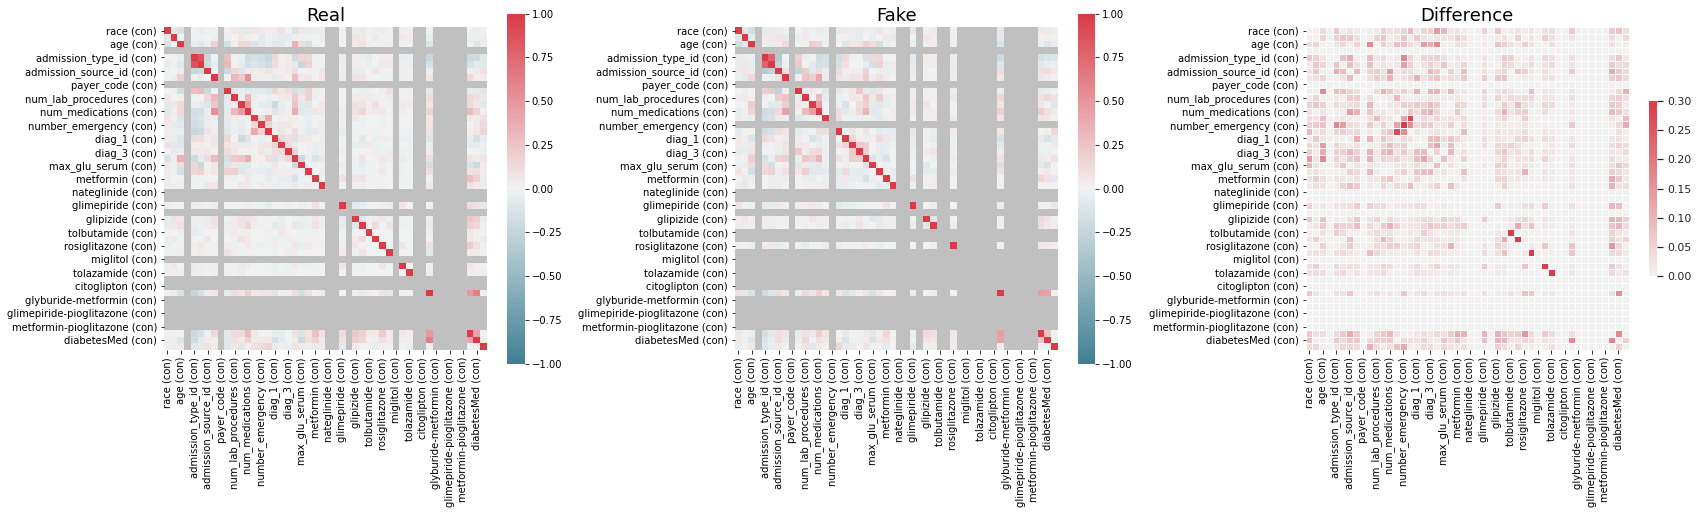

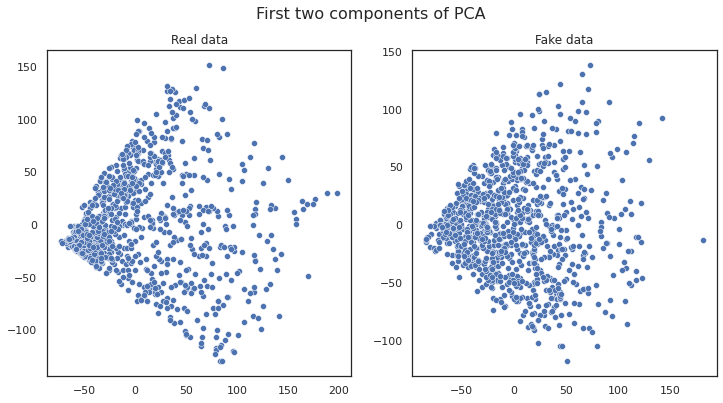

In [ ]:
# evaluating the generated dataset
table_evaluator.visual_evaluation()